In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model.data_process import *
from model.linear_trading import *
from model.reduction import *
from model.diagnosis import *
from tqdm import tqdm
from itertools import product
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
import os

import statsmodels.api as sm

datapath = "../data/final_processed/"

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# df = pd.read_csv(datapath + '/daily_prices.csv', parse_dates=['date']).sort_values(['date','ticker']).set_index('date')
# tickers = pd.read_csv("../data/sp500_tickers/sp500_historical.csv", parse_dates=['date']).set_index('date')
# tickers.shape

# datagen = DataPrepation(df, tickers)
# del tickers, df

# for year in [2016]:
#     train_start = str(year) + '-01-01'
#     train_end = str(year) + '-12-31'
#     pairs_tuned = pkl.load(open(f"../results/{train_start}-{train_end}.pkl", "rb"))
#     test_start = str(year+1) + '-01-01'
#     test_end = str(year+1) + '-12-31'
#     res_year = pd.DataFrame(columns = ['year', 'Reducing', 'Reduce_param', 'Clustering' ,'Cluster_param','pair1','pair2','pair3','pair4','pair5','pair1_name','pair2_name','pair3_name','pair4_name','pair5_name'], index = range(0, 336))
#     i=0
#     for red_name, red_vals in tqdm(pairs_tuned.items()):
#         for red_val, cluster_vals in red_vals.items():
#             for cluster_name, cluster_val in cluster_vals.items():
#                 for cluster_order, pairs in cluster_val.items():
#                     trade_data = datagen.trading_preprocess(pairs.pair.values, train_start, train_end, test_start, test_end)
#                     trade_obj = LinearMulti(trade_data)
#                     pnls = list(trade_obj.get_pnls(list = True).values())
                    
#                     res_year.iloc[i] = [year, red_name, red_val, cluster_name, cluster_order, pnls[0], pnls[1], pnls[2], pnls[3], pnls[4], pairs.pair.values[0], pairs.pair.values[1], pairs.pair.values[2], pairs.pair.values[3], pairs.pair.values[4]]                   
#                     i+=1

#     res_year.to_csv(f"../results/{test_start}-{test_end}.csv", index = False)

In [7]:
# trade_data = datagen.trading_preprocess(pairs.pair.values, train_start, train_end, test_start, test_end)
# trade_obj = LinearMulti(trade_data)
# trade_obj.get_pnls(list = True)

In [28]:

try:
    valid_res = pd.read_csv("../results/valid_res.csv")    
    best_settings_df = pd.read_csv("../results/best_settings.csv")
    best_settings_df.set_index(['year','Reducing','Clustering'], inplace = True)
    
except:
    valid_res = pd.DataFrame()
    for year in range(2011, 2020):
        test_start, test_end= str(year) + '-01-01', str(year) + '-12-31'
        valid_res = pd.concat([valid_res, pd.read_csv(f"../results/{test_start}-{test_end}.csv")], axis = 0)
    valid_res.to_csv("../results/valid_res.csv", index=False)
    best_settings_df = pd.DataFrame(columns=['year', 'Reducing', 'Reduce_param', 'Clustering', 'Cluster_param', 'pair1', 'pair2', 'pair3', 'pair4', 'pair5'])

    # Group the dataframe by unique combinations of 'Reducing' and 'Clustering'
    grouped = valid_res.groupby(['Reducing', 'Clustering'])

    # Iterate over each group
    for group_key, group_data in grouped:
        reducing, clustering = group_key
        
        # Group the group_data by 'year'
        grouped_year = group_data.groupby('year')
        
        # Iterate over each year in the group
        for year, year_data in grouped_year:
            best_row = year_data.loc[year_data[['pair1', 'pair2','pair3','pair4','pair5']].mean(axis=1).idxmax()]
            
            # Extract the relevant information from the best row
            best_settings = {
                'year': year,
                'Reducing': reducing,
                'Reduce_param': best_row['Reduce_param'],
                'Clustering': clustering,
                'Cluster_param': best_row['Cluster_param'],
                'pair1': best_row['pair1'],
                'pair2': best_row['pair2'],
                'pair3': best_row['pair3'],
                'pair4': best_row['pair4'],
                'pair5': best_row['pair5']
            }
            
            best_settings_df = best_settings_df.append(best_settings, ignore_index=True)

    # Print the best hyperparameter settings by year for each Reducing and Clustering combination
    best_settings_df.to_csv("../results/best_settings.csv", index=False)


In [15]:
valid_res.pivot_table(index = ['Reducing', 'Reduce_param', 'Clustering' ,'Cluster_param'], columns = 'year', values = ['pair1', 'pair2', 'pair3', 'pair4', 'pair5'], aggfunc = 'mean')


pair1            \
year                                                        2010      2011   
Reducing Reduce_param Clustering         Cluster_param                       
KPCA     0            KMeans             0              0.054433 -0.018082   
                                         1              0.054433  0.009758   
                                         2              0.054433  0.022979   
                                         3              0.046003  0.051194   
                      OPTICS             0              0.054433  0.009758   
...                                                          ...       ...   
UMAP     8            SpectralClustering 0              0.054433  0.006051   
                                         1              0.076432  0.014425   
                                         2              0.047339 -0.018082   
                                         3             -0.099930 -0.056367   
                                         4              0.047339  0.006051   

                                                                            \
year                                                        2012      2013   
Reducing Reduce_param Clustering         Cluster_param                       
KPCA     0            KMeans             0             -0.253914  0.001210   
                                         1              0.015107  0.001210   
                                         2              0.015107  0.001787   
                                         3             -0.020953  0.001787   
                      OPTICS             0              0.015107  0.001210   
...                                                          ...       ...   
UMAP     8            SpectralClustering 0             -0.253914 -0.024806   
                                         1              0.011669  0.065376   
                                         2              0.015107  0.001210   
                                         3              0.000000  0.001210   
                                         4              0.012522  0.065376   

                                                                            \
year                                                        2014      2015   
Reducing Reduce_param Clustering         Cluster_param                       
KPCA     0            KMeans             0              0.083155  0.066971   
                                         1             -0.024777  0.066971   
                                         2             -0.024777  0.000000   
                                         3             -0.024777  0.000000   
                      OPTICS             0             -0.024777  0.066971   
...                                                          ...       ...   
UMAP     8            SpectralClustering 0              0.083155  0.066971   
                                         1              0.083155  0.000000   
                                         2              0.083155  0.107601   
                                         3             -0.057683  0.000000   
                                         4              0.055255  0.017442   

                                                                            \
year                                                        2016      2017   
Reducing Reduce_param Clustering         Cluster_param                       
KPCA     0            KMeans             0             -0.034668  0.064003   
                                         1              0.009797  0.060312   
                                         2              0.009797  0.060312   
                                         3             -0.034668  0.060312   
                      OPTICS             0              0.009797  0.044187   
...                                                          ...       ...   
UMAP     8            SpectralClustering 0              0.042483  0.145455   


In [38]:
valid_res.set_index(['Reducing','Clustering','year'])[['pair1','pair2','pair3','pair4','pair5']].stack().reset_index()

,Reducing,Clustering,year,level_3,0
0,PCA,KMeans,2010,pair1,0.054433
1,PCA,KMeans,2010,pair2,0.049434
2,PCA,KMeans,2010,pair3,-0.099930
3,PCA,KMeans,2010,pair4,-0.027516
4,PCA,KMeans,2010,pair5,0.020715
...,...,...,...,...,...
15113,UMAP,SpectralClustering,2018,pair1,0.067007
15114,UMAP,SpectralClustering,2018,pair2,0.072590
15115,UMAP,SpectralClustering,2018,pair3,0.043772
15116,UMAP,SpectralClustering,2018,pair4,0.070022


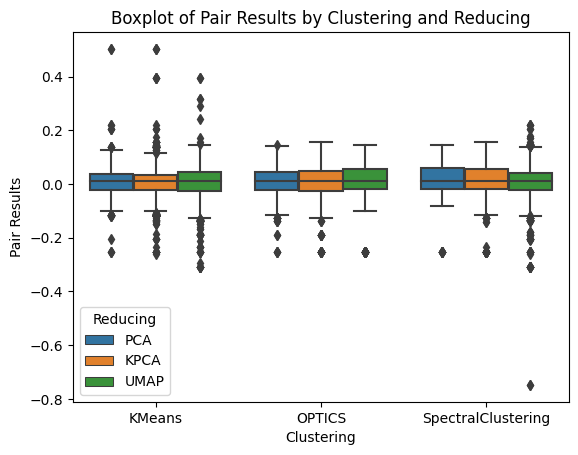

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined column for the 'pair#' results
temp = valid_res.set_index(['Reducing','Clustering','year'])[['pair1','pair2','pair3','pair4','pair5']].stack().reset_index().drop('level_3', axis=1)
temp.rename(columns={0:'pair_results'}, inplace=True)

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
sns.boxplot(x='Clustering', y='pair_results', hue='Reducing', data=temp)
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Clustering and Reducing')
plt.legend(title='Reducing')
plt.show()


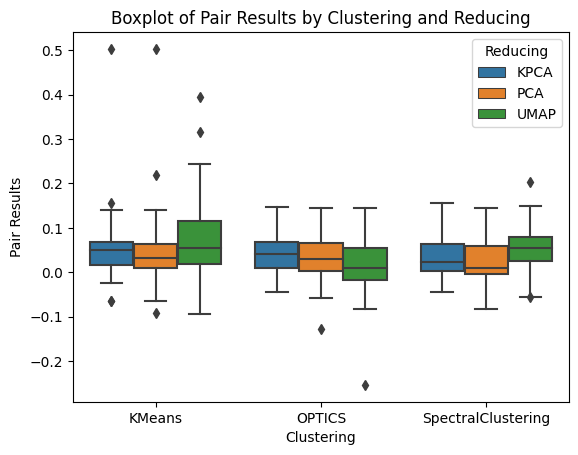

In [47]:
# best_settings_df['pair_results'] = best_settings_df[['pair1', 'pair2', 'pair3', 'pair4', 'pair5']].stack().reset_index(drop=True)

temp = best_settings_df.set_index(['Reducing','Clustering','year'])[['pair1','pair2','pair3','pair4','pair5']].stack().reset_index().drop('level_3', axis=1)
temp.rename(columns={0:'pair_results'}, inplace=True)

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
sns.boxplot(x='Clustering', y='pair_results', hue='Reducing', data=temp)
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Clustering and Reducing')
plt.legend(title='Reducing')
plt.show()


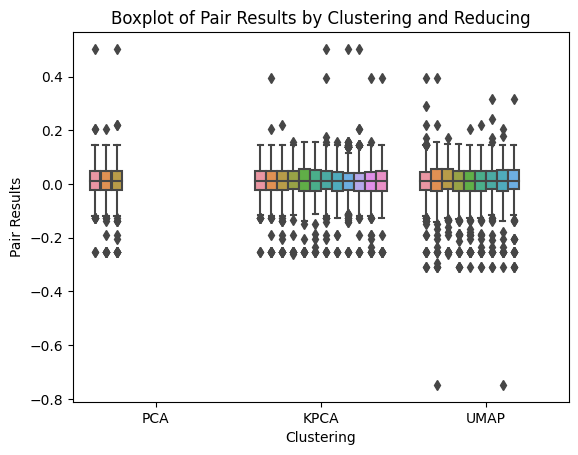

In [57]:
# Create a combined column for the 'pair#' results
temp = valid_res.set_index(['Reducing','Reduce_param','year'])[['pair1','pair2','pair3','pair4','pair5']].stack().reset_index().drop('level_3', axis=1)
temp.rename(columns={0:'pair_results'}, inplace=True)

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
g = sns.boxplot(x='Reducing', y='pair_results', hue='Reduce_param', data=temp)
g.get_legend().remove()
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Reducing')
plt.show()


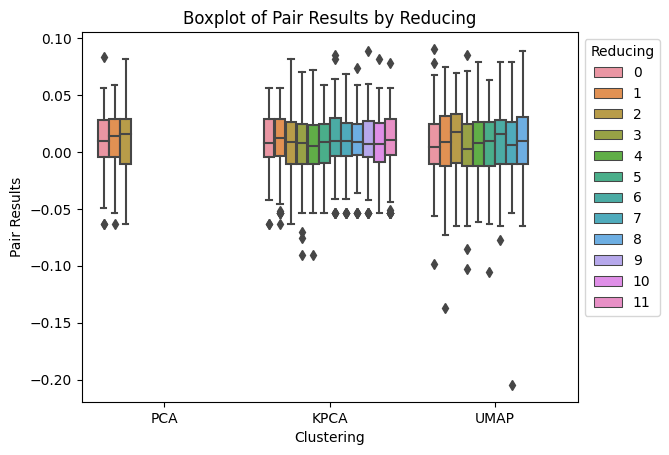

In [82]:
# Create a combined column for the 'pair#' results
temp = valid_res.set_index(['Reducing','Reduce_param','year'])[['pair1','pair2','pair3','pair4','pair5']].mean(1).reset_index()
temp.rename(columns={0:'pair_results'}, inplace=True)

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
g = sns.boxplot(x='Reducing', y='pair_results', hue='Reduce_param', data=temp)
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Reducing')
plt.legend(title='Reducing', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


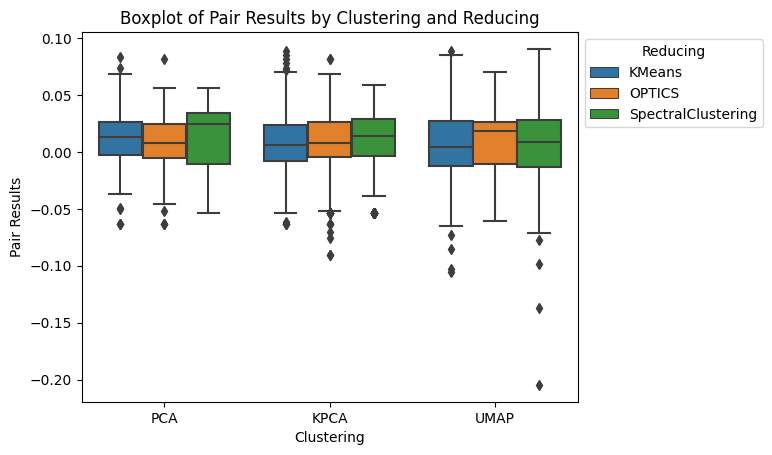

In [80]:

# Create a combined column for the 'pair#' results
valid_res['pair_results'] = valid_res[['pair1', 'pair2', 'pair3', 'pair4', 'pair5']].mean(1).reset_index(drop=True)

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
sns.boxplot(x='Reducing', y='pair_results', hue='Clustering', data=valid_res)
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Clustering and Reducing')
plt.legend(title='Reducing', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


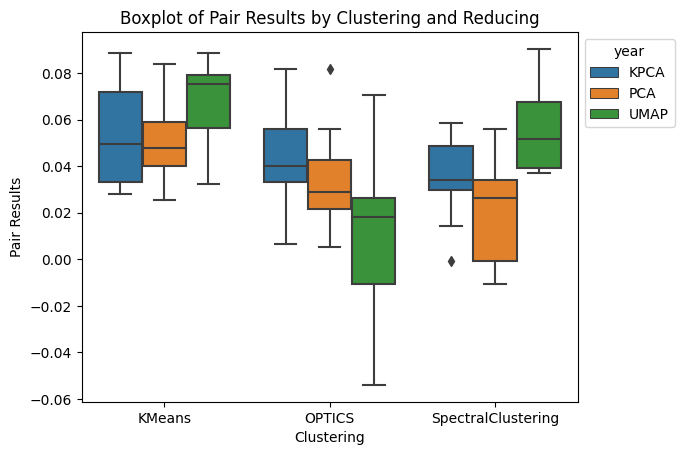

In [79]:
# best_settings_df['pair_results'] = best_settings_df[['pair1', 'pair2', 'pair3', 'pair4', 'pair5']].stack().reset_index(drop=True)

temp = best_settings_df.set_index(['Reducing','Clustering','year'])[['pair1','pair2','pair3','pair4','pair5']].mean(1).reset_index()
temp.rename(columns={0:'pair_results'}, inplace=True)

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
sns.boxplot(x='Clustering', y='pair_results', hue='Reducing', data=temp)
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Clustering and Reducing')
plt.legend(title='Reducing', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


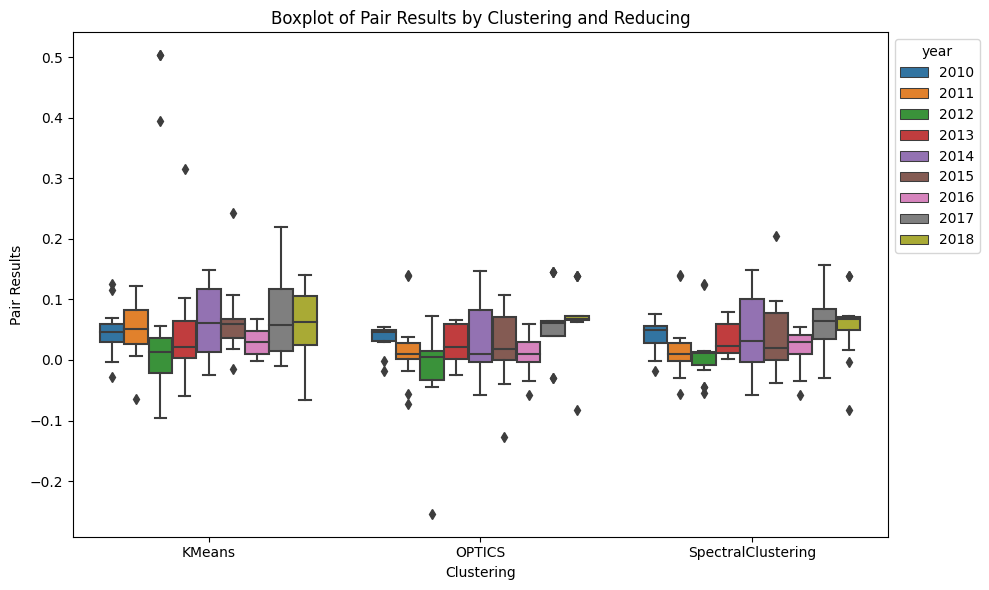

In [85]:
# best_settings_df['pair_results'] = best_settings_df[['pair1', 'pair2', 'pair3', 'pair4', 'pair5']].stack().reset_index(drop=True)

temp = best_settings_df.set_index(['Reducing','Clustering','year'])[['pair1','pair2','pair3','pair4','pair5']].stack().reset_index().drop('level_3', axis=1)
temp.rename(columns={0:'pair_results'}, inplace=True)

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='Clustering', y='pair_results', hue='year', data=temp)
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Clustering and Reducing')
plt.legend(title='year', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


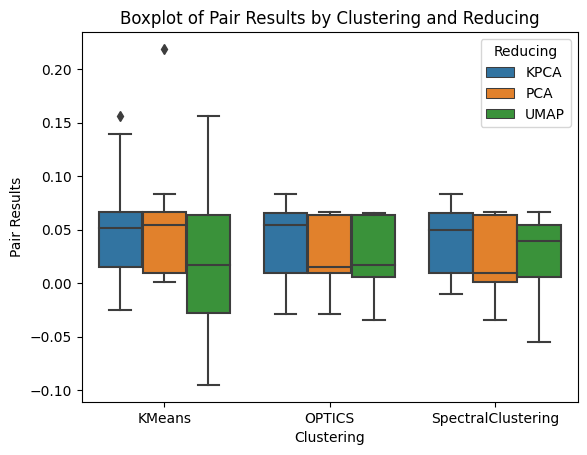

In [71]:
# best_settings_df['pair_results'] = best_settings_df[['pair1', 'pair2', 'pair3', 'pair4', 'pair5']].stack().reset_index(drop=True)

temp = best_settings_df.set_index(['Reducing','Clustering','year'])[['pair1']].reset_index()

# Plot boxplots for each combination of 'Clustering' and 'Reducing'
sns.boxplot(x='Clustering', y='pair1', hue='Reducing', data=temp)
plt.xlabel('Clustering')
plt.ylabel('Pair Results')
plt.title('Boxplot of Pair Results by Clustering and Reducing')
plt.legend(title='Reducing')
plt.show()


## Test data

In [96]:
import pandas as pd
from model.data_process import *
from model.linear_trading import *
from model.reduction import *
from model.diagnosis import *

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans, OPTICS, SpectralClustering
from sklearn.model_selection import ParameterGrid

import umap
from statsmodels.tsa.stattools import coint
from itertools import product, combinations
from collections import defaultdict
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import os
import time

import statsmodels.api as sm

datapath = "../data/final_processed/"

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
best_settings_df = pd.read_csv("../results/best_settings.csv").set_index(['year','Reducing','Clustering'])

daily = pd.read_csv(datapath + '/daily_prices.csv', parse_dates=['date']).sort_values(['date','ticker']).set_index('date')
ratios = pd.read_csv(datapath + '/firm_ratios.csv', parse_dates=['date']).sort_values(['date','ticker']).set_index('date')
sectors = pd.read_csv(datapath + '/sectors.csv', parse_dates=['date']).sort_values(['date','ticker']).set_index('date')
short = pd.read_csv(datapath + '/short_interest_rate.csv', parse_dates=['date']).sort_values(['date','ticker']).set_index('date')
df = daily.merge(ratios, on=['ticker', 'date'], how = 'left')
df = df.merge(short, on =['ticker', 'date'], how = 'left')
df = df.merge(sectors, on=['ticker', 'date'], how = 'left')

tickers = pd.read_csv("../data/sp500_tickers/sp500_historical.csv", parse_dates=['date']).set_index('date')

datagen = DataPrepation(df, tickers)
del tickers, df, daily, ratios, sectors, short

In [129]:
dim_reduction_methods = {
    'PCA': {'name': 'PCA', 'method': PCA, 'params': {'n_components': [2, 3, 4]}},
    'KPCA': {'name': 'KPCA', 'method': KernelPCA, 'params': {'n_components': [2, 3, 4], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}},
    'UMAP': {'name': 'UMAP', 'method': umap.UMAP, 'params': {'n_components': [2, 3, 4], 'n_neighbors': [5, 10, 15]}}
}

clustering_algorithms = {
    'KMeans': {'name': 'KMeans', 'method': KMeans, 'params': {'n_clusters': [5, 10, 15, 30], 'n_init': ['auto']}},
    'OPTICS': {'name': 'OPTICS', 'method': OPTICS, 'params': {'min_samples': [7, 9, 10, 15, 30]}},
    'SpectralClustering': {'name': 'SpectralClustering', 'method': SpectralClustering, 'params': {'n_clusters': [7, 9, 10, 15, 30]}}
}

dim_red_name = ['PCA', 'KPCA', 'UMAP']
cluster_name = ['KMeans', 'OPTICS', 'SpectralClustering']

In [130]:
def save_test_cluster(year):
    train_start = str(year) + '-01-01'
    train_end = str(year+1) + '-12-31'
    test_start = str(year+2) + '-01-01'
    test_end = str(year+2) + '-12-31'
    
    start_time = time.time()
    X_train, idx, price_norm = datagen.dimension_reduction_preprocess(train_start, train_end)
    price_norm_df = datagen.price_norm(train_start, train_end)
    coint_selector = CointegratedSelection(price_norm_df)
    
    results = pd.DataFrame()
    for dim_red, cluster in product(dim_red_name, cluster_name):
        dim_red_param_num = best_settings_df.loc[(year, dim_red, cluster), 'Reduce_param']
        
        
        dim_red_map = dim_reduction_methods[dim_red]
        reducer = DimensionalityReduction(dim_red_map['method'], dim_red_map['name'], 
                                          X_train, idx, price_norm)
        params  = [i for i in ParameterGrid(dim_red_map['params'])][dim_red_param_num]
        reduced_data = reducer.dimensionality_reduction(params)

        cluster_map = clustering_algorithms[cluster]
        cluster_param_num = best_settings_df.loc[(year, dim_red, cluster), 'Cluster_param']
        
        cluster_obj = Clustering(cluster_map['method'], cluster_map['name'], reduced_data)
        params  = [i for i in ParameterGrid(cluster_map['params'])][cluster_param_num]
        clustered = cluster_obj.train_clustering(params, cluster_map['name'])
        
        pairs_list = coint_selector.select_cointegrated_pairs(clustered)
        
        trade_data = datagen.trading_preprocess(pairs_list.pair.values, train_start, train_end, test_start, test_end)
        trade_obj = LinearMulti(trade_data)
        pnls = list(trade_obj.get_pnls(list = True).values())
        
        result = {
            'year': year,
            'Reducing': dim_red,
            'Clusteirng': cluster,
            'pair1': pnls[0],
            'pair2': pnls[1],
            'pair3': pnls[2],
            'pair4': pnls[3],
            'pair5': pnls[4],
            'mean_return': sum(pnls)/5,
            'pair1_name': pairs_list.pair.values[0],
            'pair2_name': pairs_list.pair.values[1],
            'pair3_name': pairs_list.pair.values[2],
            'pair4_name': pairs_list.pair.values[3],
            'pair5_name': pairs_list.pair.values[4],
        }
        
        results = results.append(result, ignore_index=True)
        
        
    return results

In [126]:
first = True
for y in tqdm(range(2015, 2019)):
    temp = save_test_cluster(y)
    if first:
        temp.to_csv("../results/test_result.csv", index=False)
        first= False
    else:
        temp.to_csv("../results/test_result.csv", index=False, header=False, mode='a')

  0%|          | 0/9 [00:44<?, ?it/s]


KeyError: 'SpectralClustering'